<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Рассчет-эффективности-обогощения" data-toc-modified-id="Рассчет-эффективности-обогощения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Рассчет эффективности обогощения</a></span></li><li><span><a href="#Анализ-признаков-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Анализ-изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборке" data-toc-modified-id="Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборке-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья на обучающей и тестовой выборке</a></span></li><li><span><a href="#Cуммарная-концентрация-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Cуммарная-концентрация-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cуммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения компании, разрабатывающей решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Имеются данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

План работы:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

In [7]:
!pip install pycodestyle pycodestyle_magic
!pip install flake8
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


## Подготовка данных

In [8]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import warnings
import seaborn as sb
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    make_scorer)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    KFold)
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (
    LinearRegression,
    RidgeCV)
from sklearn.dummy import DummyRegressor

### Изучение данных

In [9]:
# Загрузка данных
gold_recovery_full_new = pd.read_csv('gold_industry_full.csv')
gold_recovery_test_new = pd.read_csv('gold_industry_test.csv')
gold_recovery_train_new = pd.read_csv('gold_industry_train.csv')
print(gold_recovery_full_new.shape, gold_recovery_test_new.shape,
      gold_recovery_train_new.shape)

(19439, 87) (4860, 53) (14579, 87)


In [10]:
test = gold_recovery_test_new.copy()
full = gold_recovery_full_new.copy()
train = gold_recovery_train_new.copy()

Для обучения моделей необходимо, чтобы в обучающей и тестовой выборке было одинаковое количество признаков.
Также в тестовой выборке нет целевых признаков, их нужно определить из полной выборки.

Восстановим целевые признаки в тестовой выборке

In [11]:
columns = set(full.columns) - set(['date', 'final.output.recovery',
                                   'rougher.output.recovery'])
full = full.drop(columns=columns, axis=1)
# тестовая выборка с целевыми признаками
test2 = test.merge(full, on='date', how='left')

In [12]:
test2.head(2)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,89.514960,70.281454
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246


In [13]:
test2.isnull().sum()

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


Пропусков в целевых признаках нет.
Подготовим обучающие данные удалив из них признаки, которых нет в тестовой выборке

In [14]:
columns_for_deleted = set(gold_recovery_train_new.columns) - set(
    gold_recovery_test_new.columns) - set(
    ['final.output.recovery', 'rougher.output.recovery'])
columns_for_deleted = list(columns_for_deleted)
train = gold_recovery_train_new.copy()
train = train.drop(columns=columns_for_deleted, axis=1)
train.shape

(14579, 55)

Переименуем данные:

In [15]:
test = test2.copy()

### Рассчет эффективности обогощения

• C — доля золота в концентрате после флотации/очистки;

• F — доля золота в сырье/концентрате до флотации/очистки;

• T — доля золота в отвальных хвостах после флотации/очистки

In [16]:
# Функция расчета эффективности обогощения
def recovery(C, F, T):
    result = C * (F - T) / (F * (C - T)) * 100
    return result

Так как анализ проводится на полной обучающей выборке со всеми признакми, создадим еще раз train_all - содержащий все признаки

In [17]:
train_all = gold_recovery_train_new.copy()

In [18]:
recovery_train = train_all['rougher.output.recovery']
C = train_all['rougher.output.concentrate_au']
F = train_all['rougher.input.feed_au']
T = train_all['rougher.output.tail_au']

In [19]:
print(round(recovery(C, F, T).median(), 5))
print(round(recovery_train.median(), 5))

85.9465
85.9465


Медианные значения расчитанной эффективности и взятой из таблицы - совпадают

In [20]:
# Расчитаем mae
mae = mean_absolute_error(recovery_train, recovery(C, F, T))
round(mae, 5)

0.0

Эффективность расчитана верно.

### Анализ признаков недоступных в тестовой выборке

In [21]:
set(gold_recovery_train_new.columns) - set(gold_recovery_test_new.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Во-первых, в тестовой выборке не было таргетов. Во-вторых, там не было данных о параметрах продуктов. Эти данные неизвестны до начала технологического процесса и через них можно вычислить целевой признак. В-третьих, не было расчетных данных, которые в себе могли также содержать информацию о целевом признаке.

### Предобработка данных

In [22]:
train.isnull().sum()

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          72
rougher.input.feed_sol                         77
rougher.input.feed_rate                         7
rougher.input.feed_size                       101
rougher.input.floatbank10_sulfate              31
rougher.input.floatbank10_xanthate              7
rougher.state.floatbank10_a_air                 0
rougher.state.floatbank10_a_level               0
rougher.state.floatbank10_b_air                 0
rougher.state.floatbank10_b_level               0
rougher.state.floatbank10_c_air                 0
rougher.state.floatbank10_c_level               0
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air               429
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


Есть пропуски почти в каждом столбце. Проверим какая часть данных имеет пропуски:

In [23]:
print('Доля пропусков в трейне',
      round((1-(train.dropna().shape[0] / train.shape[0])) * 100, 2), '%')
print('Доля пропусков в тесте',
      round((1-(test.dropna().shape[0] / test.shape[0])) * 100, 2), '%')

Доля пропусков в трейне 8.29 %
Доля пропусков в тесте 6.65 %


In [24]:
train_not_null = train.ffill(axis=0)
test_not_null = test.ffill(axis=0)

In [25]:
train_not_null.isnull().sum()

date                                          0
rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_c_level             0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level       

Проверим наличие дубликатов

In [26]:
print(test_not_null.duplicated().sum(), train_not_null.duplicated().sum())

0 0


Дубликатов нет. 

In [27]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print("Top Absolute Correlations")
сorr_columns = get_top_abs_correlations(
    train_not_null.drop(columns='date', axis=1), 40)
print(сorr_columns)

Top Absolute Correlations
rougher.state.floatbank10_b_level           rougher.state.floatbank10_c_level             0.989389
rougher.state.floatbank10_c_level           rougher.state.floatbank10_d_level             0.980289
rougher.state.floatbank10_e_level           rougher.state.floatbank10_f_level             0.979850
rougher.state.floatbank10_b_level           rougher.state.floatbank10_d_level             0.972879
primary_cleaner.state.floatbank8_a_air      primary_cleaner.state.floatbank8_b_air        0.963371
rougher.state.floatbank10_c_level           rougher.state.floatbank10_e_level             0.962928
rougher.state.floatbank10_b_level           rougher.state.floatbank10_e_level             0.954842
rougher.state.floatbank10_c_level           rougher.state.floatbank10_f_level             0.954201
rougher.state.floatbank10_d_level           rougher.state.floatbank10_f_level             0.951983
                                            rougher.state.floatbank10_e_level      

Удалим признаки с кореррялцией более 0,9

In [28]:
t = pd.DataFrame(сorr_columns[сorr_columns >= 0.9].index)
columns_with_corr = []
for i in range(len(t)):
    columns_with_corr.append(t.iloc[i, 0][0])
columns_with_corr

['rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_b_level',
 'primary_cleaner.state.floatbank8_a_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_b_level',
 'primary_cleaner.state.floatbank8_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_b_air',
 'primary_cleaner.state.floatbank8_b_air',
 'rougher.state.floatbank10_c_air',
 'primary_cleaner.state.floatbank8_a_air']

In [29]:
test_not_null_not_corr = test_not_null.copy()
test_not_null_not_corr = test_not_null_not_corr.drop(
    columns=columns_with_corr, axis=1)
train_not_null_not_corr = train_not_null.copy()
train_not_null_not_corr = train_not_null_not_corr.drop(
    columns=columns_with_corr, axis=1)
print(test_not_null_not_corr.shape, train_not_null_not_corr.shape)

(4860, 45) (14579, 45)


Проанализируем оставшиеся признаки на наличие аномалий.

In [30]:
# Построим гистограммы по всем столбцам
train_not_null_not_corr.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery
count,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,...,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000,14579.000000
mean,8.352941,8.877460,3.592094,36.545646,474.284502,59.070865,12.406554,5.993247,1104.208278,-379.367166,...,-484.971102,14.823764,-460.046154,15.394610,-487.973768,11.949009,-486.338692,18.927133,-505.688730,66.759066
std,1.934376,1.922536,1.068227,5.221540,108.540067,22.903811,3.460023,1.155053,162.235606,94.652311,...,48.795359,4.863659,67.933026,5.405045,35.231439,5.241169,38.726292,5.550736,37.347370,10.619709
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464,0.000000
25%,6.932996,7.341922,2.868687,34.076253,411.020607,47.322462,10.002228,5.303563,999.644856,-499.861797,...,-500.704937,11.889685,-500.184081,10.977413,-500.451167,8.947381,-500.129137,14.985684,-500.755346,63.114596
50%,8.225284,8.715859,3.524599,37.091668,498.144696,54.464259,12.003079,6.003001,1000.982624,-300.314199,...,-499.820809,14.957945,-499.424528,14.963654,-499.772653,11.000057,-499.926255,19.960781,-500.054273,67.962788
75%,9.832210,10.255843,4.253958,39.885734,549.576867,64.469177,14.917931,6.796563,1292.663971,-299.989315,...,-498.048862,17.125406,-400.083087,18.012762,-498.182011,14.002573,-499.285414,23.038231,-499.506135,72.598187
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-123.307487,100.000000


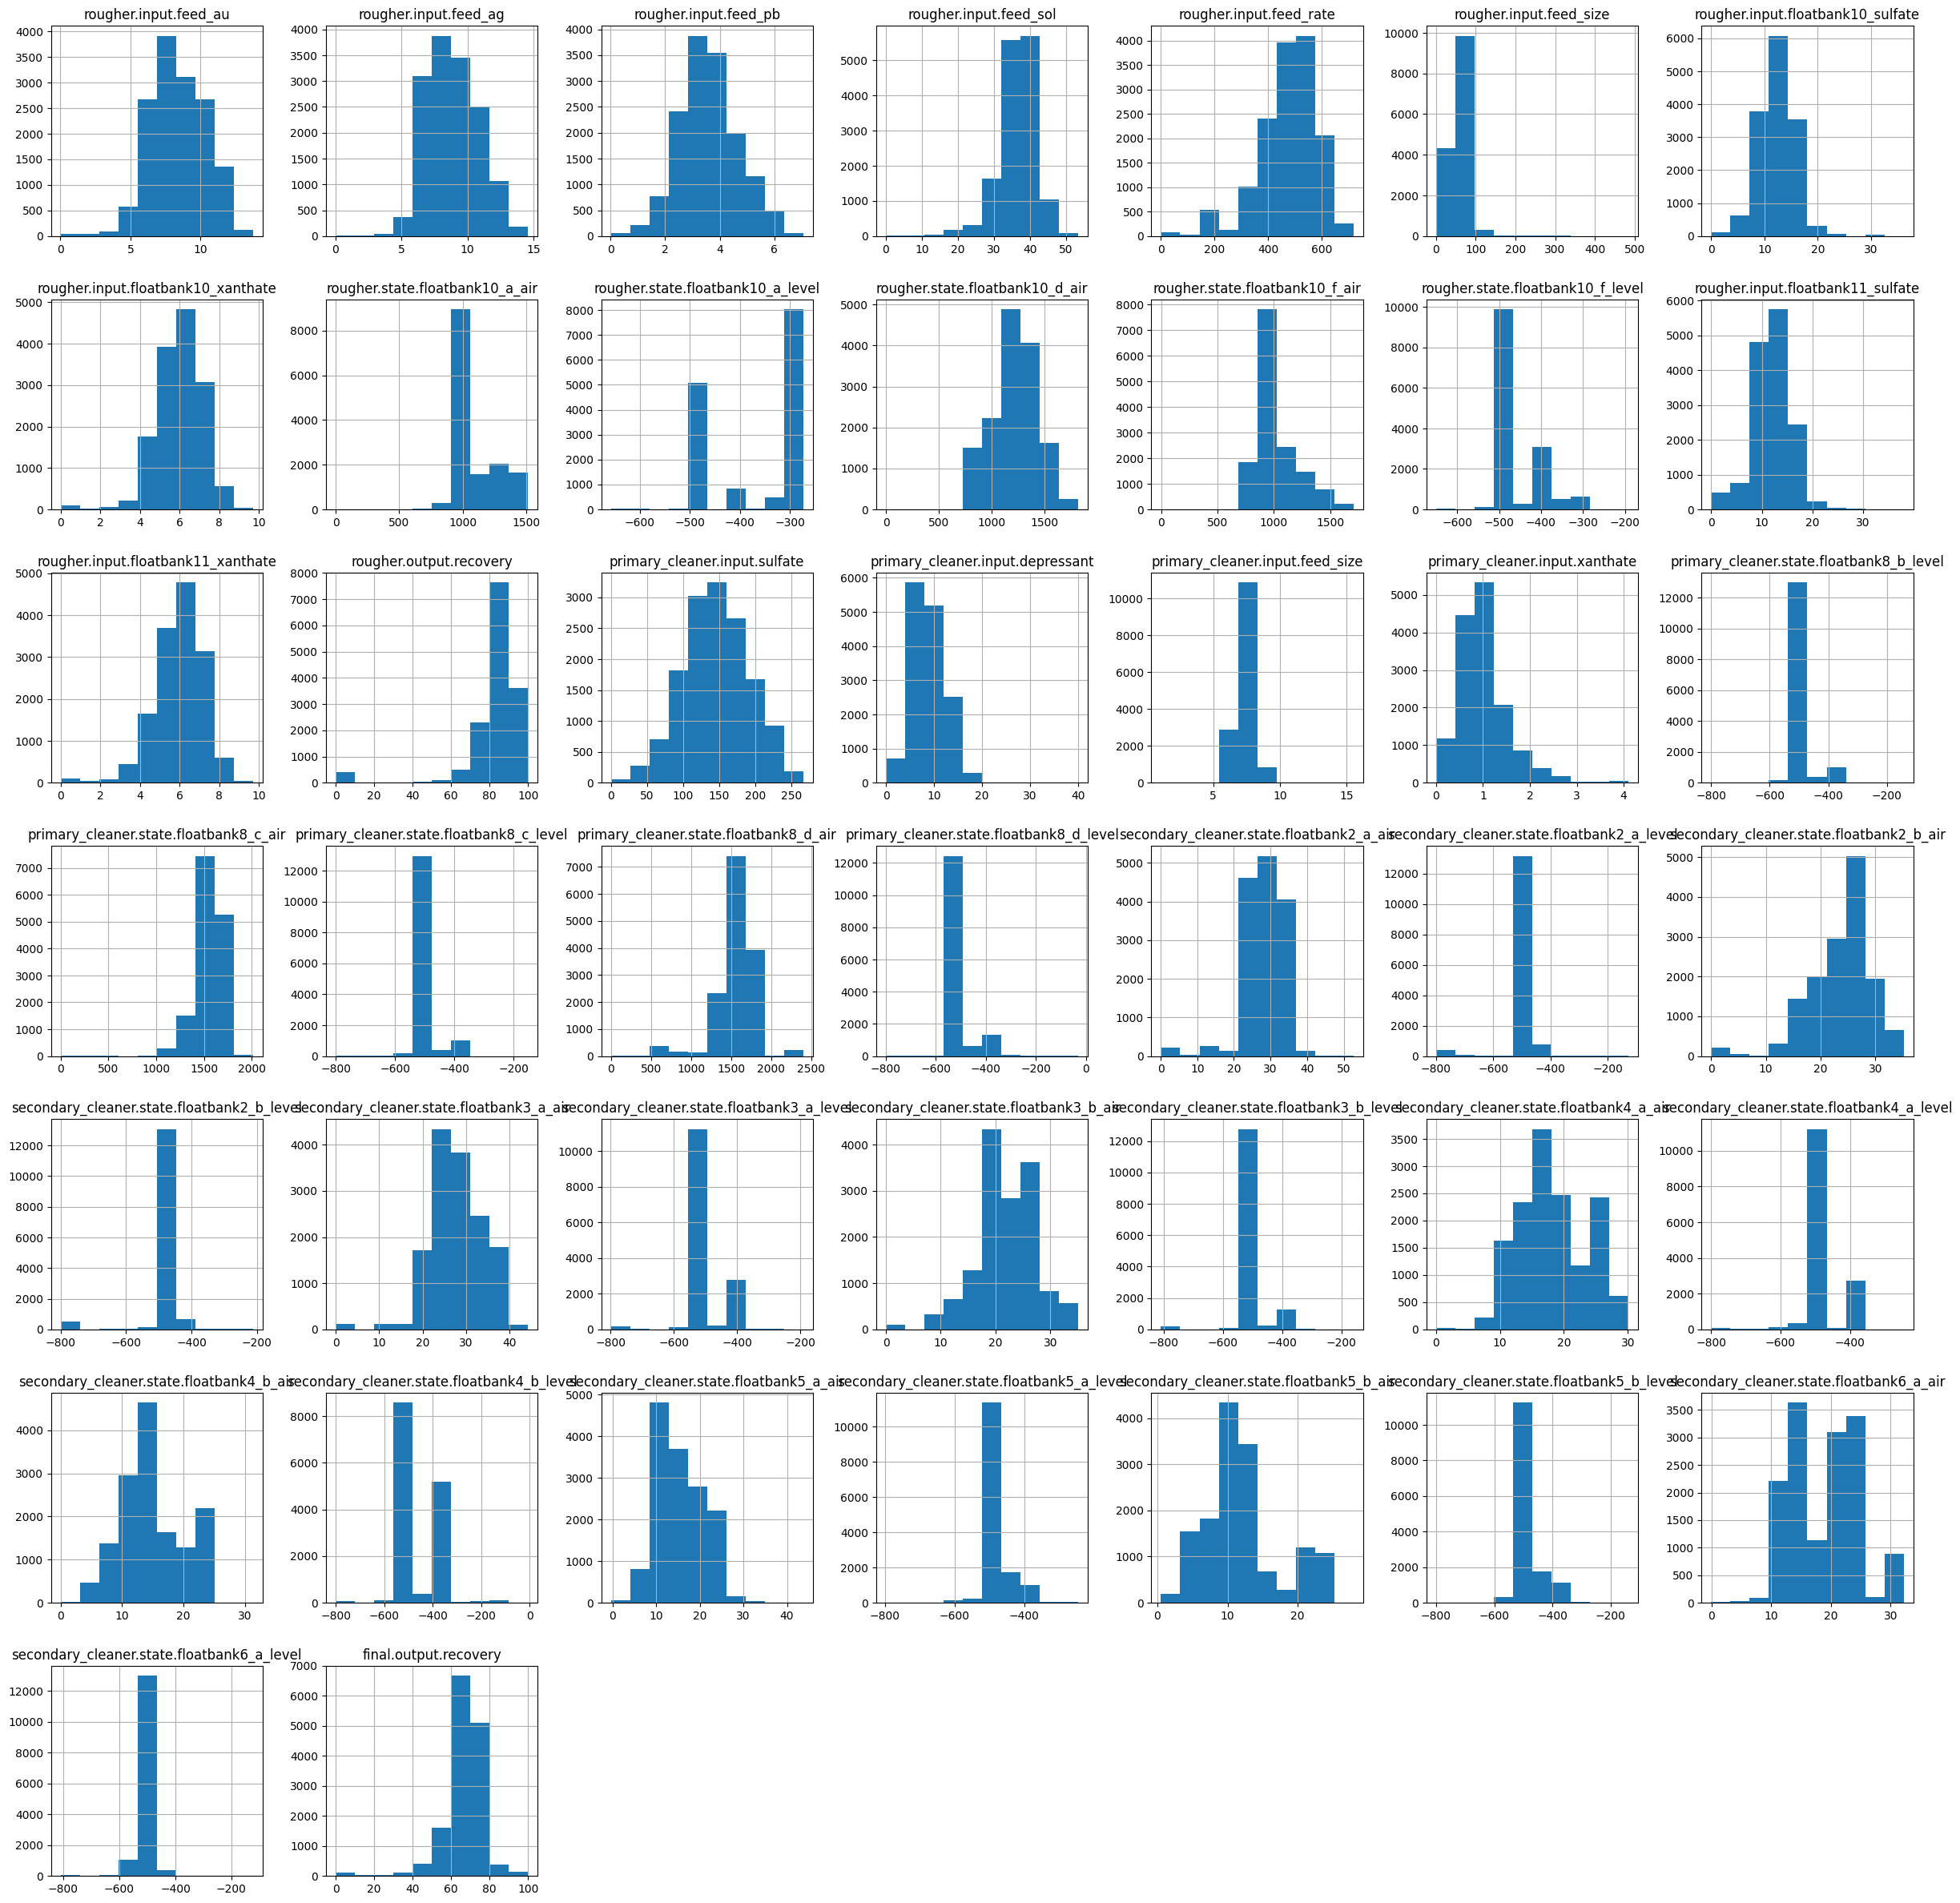

In [31]:
train_not_null_not_corr.hist(bins = 10, figsize = (30, 30))
plt.show() 

In [32]:
# Удалим аномалии
train_not_null_not_corr = train_not_null_not_corr[(train_not_null_not_corr[
    'primary_cleaner.state.floatbank8_c_level'] > (-700))]
train_not_null_not_corr = train_not_null_not_corr[(train_not_null_not_corr[
    'primary_cleaner.state.floatbank8_d_level'] > (-700))]
train_not_null_not_corr = train_not_null_not_corr[(train_not_null_not_corr[
    'rougher.input.feed_size'] < 120)]
train_not_null_not_corr = train_not_null_not_corr[(train_not_null_not_corr[
    'rougher.input.feed_rate'] > 100)]
train_not_null_not_corr = train_not_null_not_corr[(train_not_null_not_corr[
    'secondary_cleaner.state.floatbank2_b_level'] > (-700))]
train_not_null_not_corr = train_not_null_not_corr[(train_not_null_not_corr[
    'secondary_cleaner.state.floatbank2_b_air'] > (10))]
train_not_null_not_corr = train_not_null_not_corr[(train_not_null_not_corr[
    'secondary_cleaner.state.floatbank4_a_level'] > (-700))]
train_not_null_not_corr = train_not_null_not_corr[(train_not_null_not_corr[
    'secondary_cleaner.state.floatbank5_b_level'] > (-700))]
train_not_null_not_corr = train_not_null_not_corr[(train_not_null_not_corr[
    'secondary_cleaner.state.floatbank6_a_level'] > (-800))]
train_not_null_not_corr = train_not_null_not_corr[(train_not_null_not_corr[
    'final.output.recovery'] > (20))]
train_not_null_not_corr = train_not_null_not_corr[(train_not_null_not_corr[
    'rougher.output.recovery'] > (40))]
# Удалим аномалии из данных train_all (содержат все признаки)
# Удалим аномалии
train_all = train_all[(train_all[
    'primary_cleaner.state.floatbank8_c_level'] > (-700))]
train_all = train_all[(train_all[
    'primary_cleaner.state.floatbank8_d_level'] > (-700))]
train_all = train_all[(train_all[
    'rougher.input.feed_size'] < 120)]
train_all = train_all[(train_all[
    'rougher.input.feed_rate'] > 100)]
train_all = train_all[(train_all[
    'secondary_cleaner.state.floatbank2_b_level'] > (-700))]
train_all = train_all[(train_all[
    'secondary_cleaner.state.floatbank2_b_air'] > (10))]
train_all = train_all[(train_all[
    'secondary_cleaner.state.floatbank4_a_level'] > (-700))]
train_all = train_all[(train_all[
    'secondary_cleaner.state.floatbank5_b_level'] > (-700))]
train_all = train_all[(train_all[
    'secondary_cleaner.state.floatbank6_a_level'] > (-800))]
train_all = train_all[(train_all[
    'final.output.recovery'] > (20))]
train_all = train_all[(train_all[
    'rougher.output.recovery'] > (40))]

Промасштабируем данные

In [33]:
columns = list(set(train_not_null_not_corr.columns) - set([
    'final.output.recovery', 'rougher.output.recovery', 'date']))
scaler = StandardScaler().fit(train_not_null_not_corr[columns])
train_scaler = train_not_null_not_corr.copy()
test_scaler = test_not_null_not_corr.copy()
train_scaler[columns] = scaler.transform(train_not_null_not_corr[columns])
test_scaler[columns] = scaler.transform(test_not_null_not_corr[columns])

Признаков слишком много, может быть есть какие-либо коррелирующие друг с другом. Например, использование какого-то конкретного реагента в определенном объеме требует использование на следующем этапе определенного реагента с определенным объемом в силу технологического процесса. Так как мы не знаем тонкостей технологического процесса определим как признаки коррелируют друг с другом.

In [34]:
train_scaler.shape

(13161, 45)

Разделим данные на обучающие и целевые признаки

In [35]:
features_train = train_scaler.drop(columns=[
    'final.output.recovery', 'rougher.output.recovery', 'date'],
                                   axis=1)
target_train = train_scaler[['final.output.recovery',
                             'rougher.output.recovery']]
features_test = test_scaler.drop(
    columns=['final.output.recovery',
             'rougher.output.recovery', 'date'],
    axis=1)
target_test = test_scaler[
    ['final.output.recovery', 'rougher.output.recovery']]
print(features_train.shape, target_train.shape,
      features_test.shape, target_test.shape)

(13161, 42) (13161, 2) (4860, 42) (4860, 2)


### Вывод

Были подготовлены данные:
- Удалены пропуски (10% данных).
- удалены сильно коррелирующие признаки (корреляция более 0,85).
- Удалены признаки, которых не было в тесте (данные, которые можно получить во время технологического процесса, но не в начале).
- Добавлены таргетированые признаки в тестовую выборку.
- Была проведена проверка на дубликатов.
- Удалены аномалии.


## Анализ данных

### Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Создадим датафрем для данных о концентрации металов на различных этапах отчистки.

In [36]:
concentration_au = pd.DataFrame(
    train_all.loc[:, [
        'rougher.input.feed_au',
        'rougher.output.concentrate_au',
        'primary_cleaner.output.concentrate_au',
        'final.output.concentrate_au'
    ]])
concentration_ag = pd.DataFrame(
    train_all.loc[:, [
        'rougher.input.feed_ag',
        'rougher.output.concentrate_ag',
        'primary_cleaner.output.concentrate_ag',
        'final.output.concentrate_ag'
    ]])
concentration_pb = pd.DataFrame(
    train_all.loc[:, [
        'rougher.input.feed_pb',
        'rougher.output.concentrate_pb',
        'primary_cleaner.output.concentrate_pb',
        'final.output.concentrate_pb'
    ]])
stats_au = concentration_au.describe()
stats_ag = concentration_ag.describe()
stats_pb = concentration_pb.describe()
stats_mean = stats_au[stats_au.index == 'mean']
stats_mean = stats_mean.rename(
    columns={
        "rougher.input.feed_au": "rougher.input",
        "rougher.output.concentrate_au": "rougher",
        "primary_cleaner.output.concentrate_au": "primary",
        "final.output.concentrate_au": "final"
    })
stats_mean = stats_mean.reset_index(drop=True)
stats_mean.loc[1] = stats_ag[stats_ag.index == 'mean'].to_numpy()[0]
stats_mean.loc[2] = stats_pb[stats_pb.index == 'mean'].to_numpy()[0]
stats_mean = stats_mean.rename(index={
                               0: "au",
                               1: "ag",
                               2: "pb"})
stats_mean = stats_mean.T
stats_mean

,au,ag,pb
rougher.input,8.344916,8.890451,3.598062
rougher,20.285334,12.285505,7.693653
primary,32.048164,8.510891,9.785641
final,44.375600,5.206221,10.011751


[Text(0.5, 0, 'Этап'), Text(0, 0.5, 'Средняя концентрация металлов')]

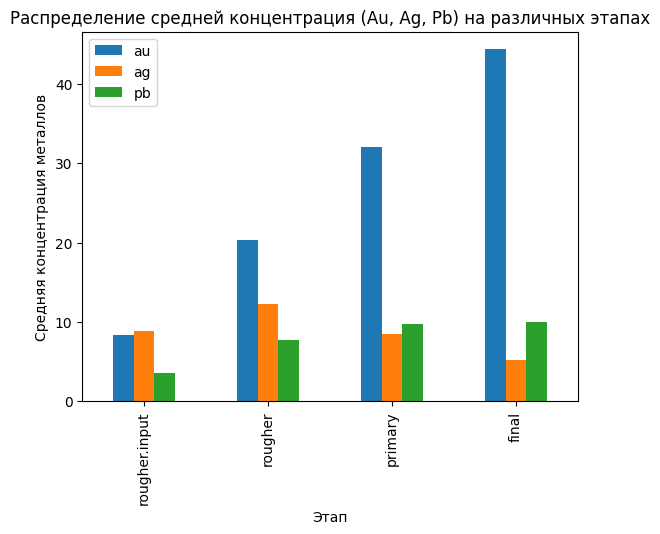

In [37]:
ax = stats_mean.plot(kind='bar')
ax.set_title(
    'Распределение средней концентрация (Au, Ag, Pb) на различных этапах'
            )
ax.set(xlabel='Этап', ylabel='Средняя концентрация металлов')

Видно, что концентрация золота растет (что логично, мы его и ищем). Концентрация ag падает, концентрация pb - растет, но незначительно, по сравнению с концентрацией золота.

### Распределения размеров гранул сырья на обучающей и тестовой выборке

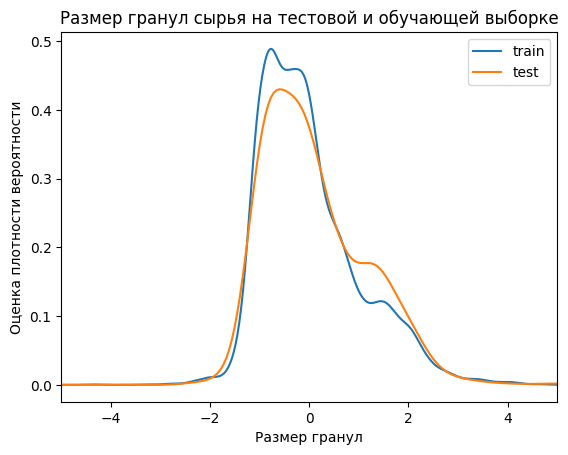

In [38]:
ax1 = features_train['rougher.input.feed_size'].plot.density()
ax2 = features_test['rougher.input.feed_size'].plot.density()
plt.legend(['train', 'test'])
plt.xlim([-5, 5])
plt.title('Размер гранул сырья на тестовой и обучающей выборке')
plt.xlabel('Размер гранул')
plt.ylabel('Оценка плотности вероятности')
plt.show()

Данные в обучающей и тестовой выборке близки по своим значениям.

### Cуммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [39]:
concentration_au = concentration_au.rename(columns={"rougher.input.feed_au" :"rougher.input",
                               "rougher.output.concentrate_au": "rougher", 
                                "primary_cleaner.output.concentrate_au": "primary",
                                "final.output.concentrate_au": "final"})

concentration_ag = concentration_ag.rename(columns={"rougher.input.feed_ag" :"rougher.input",
                               "rougher.output.concentrate_ag": "rougher", 
                                "primary_cleaner.output.concentrate_ag": "primary",
                                "final.output.concentrate_ag": "final"})

concentration_pb = concentration_pb.rename(columns={"rougher.input.feed_pb" :"rougher.input",
                               "rougher.output.concentrate_pb": "rougher", 
                               "primary_cleaner.output.concentrate_pb": "primary",
                                "final.output.concentrate_pb": "final"})

concentration = concentration_au + concentration_ag + concentration_pb
concentration = concentration.drop(columns=['primary'], axis = 1)
concentration.describe()

,rougher.input,rougher,final
count,13042.000000,13104.000000,13103.000000
mean,20.876203,40.264491,59.594744
std,4.368286,3.812652,3.984560
min,0.030000,0.030000,1.685441
25%,17.422821,38.594960,59.303209
50%,20.374638,40.443500,60.270957
75%,23.980712,42.478488,61.050522
max,33.324268,50.432394,64.968881


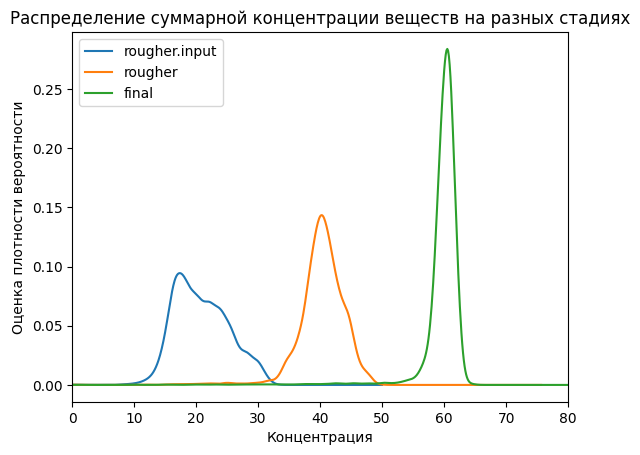

In [40]:
concentration.plot.density()
plt.legend(['rougher.input',	'rougher',	'final'])
plt.title('Распределение суммарной концентрации веществ на разных стадиях')
plt.xlabel('Концентрация')
plt.ylabel('Оценка плотности вероятности')
plt.xlim([0, 80])
plt.show()

На финальной стадии концентрация всех веществ максимальная. С каждым этапом - концентрация веществ увеличивается.

## Модель

### Функция для вычисления итоговой sMAPE

In [41]:
def smape(target, predictions):
    a = predictions
    f = target
    result_ = 1 / len(a) * 100 * np.sum(
        2 * np.abs(f - a) / (np.abs(a) + np.abs(f)))
    return result_

### Обучение моделей

Модель RidgeCV

In [42]:
rcv1 = RidgeCV(scoring=make_scorer(smape, greater_is_better=False), cv=5).fit(
    features_train, target_train['rougher.output.recovery'])
smape_rougher = rcv1.best_score_
alpha_rougher = rcv1.alpha_
print('sMAPE rougher', smape_rougher)
print('Параметры', alpha_rougher)

rcv2 = RidgeCV(scoring=make_scorer(smape, greater_is_better=False), cv=5).fit(
    features_train, target_train['final.output.recovery'])
smape_final = rcv2.best_score_
alpha_final = rcv2.alpha_
print('sMAPE final', smape_final)
print('Параметры', alpha_rougher)

smape_all = abs(smape_rougher)*0.25+abs(smape_final)*0.75
print('sMAPE', smape_all)

sMAPE rougher -7.035673871892792
Параметры 10.0
sMAPE final -9.309609182965309
Параметры 10.0
sMAPE 8.741125355197179


K-fold

In [46]:
def K_Fold(model, features, target):
    cv = KFold(n_splits=3, random_state=1234, shuffle=True )
    smape_score = []
    for train_index, test_index in cv.split(target):
        x_train, x_test = features[features.index.isin(train_index)], features[features.index.isin(test_index)]
        y_train, y_test = target[target.index.isin(train_index)], target[target.index.isin(test_index)]
        model.fit(x_train,y_train )
        prediction = model.predict(x_test)
        smape_score.append(smape(y_test, prediction))
    result_smape = np.sum(smape_score)/len(smape_score)
    return result_smape

Функция для обучения моделей и расчета sMAPE

In [47]:
def styding(model, features, target):
    smape_rougher = K_Fold(model, features, target['rougher.output.recovery'])
    print(smape_rougher)
    smape_final = K_Fold(model, features, target['final.output.recovery'])
    print(smape_final)
    smape_all = np.abs(smape_rougher*0.25+smape_final*0.75)
    return smape_all

In [48]:
print('RandomForestRegressor sMAPE',
      styding(RandomForestRegressor(random_state=12345),
              features_train, target_train))

2.4041111055562356
5.273887623489745
RandomForestRegressor sMAPE 4.556443494006368


In [50]:
print('DecisionTreeRegressor sMAPE',
      styding(DecisionTreeRegressor(random_state=12345),
              features_train, target_train))

3.512860340700039
7.610369464419388
DecisionTreeRegressor sMAPE 6.585992183489551


In [53]:
print('LinearRegression sMAPE',
      styding(LinearRegression(),
              features_train, target_train))

4.120114525417564
7.316255221117111
LinearRegression sMAPE 6.517220047192224


Используем на тесте модель RandomForestRegressor

In [57]:
the_best_model = RandomForestRegressor(random_state=12345)
the_best_model.fit(features_train, target_train['rougher.output.recovery'])
prediction = the_best_model.predict(features_test)
sMAPE_rougher = smape(target_test['rougher.output.recovery'], prediction)
print('sMAPE rougher', sMAPE_rougher)
the_best_model = RandomForestRegressor(random_state=12345)
the_best_model.fit(features_train, target_train['final.output.recovery'])
prediction = the_best_model.predict(features_test)
sMAPE_final = smape(target_test['final.output.recovery'], prediction)
print('sMAPE rougher', sMAPE_final)
smape_all = abs(sMAPE_rougher)*0.25+abs(sMAPE_final)*0.75
print('sMAPE', smape_all)

sMAPE rougher 2.6048252124483287
sMAPE rougher 6.142637746141951
sMAPE 5.258184612718545


In [63]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train['rougher.output.recovery'])
prediction = dummy_regr.predict(features_test)
sMAPE_rougher = smape(target_test['rougher.output.recovery'], prediction)
print('sMAPE rougher', sMAPE_rougher)
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train['final.output.recovery'])
prediction = dummy_regr.predict(features_test)
sMAPE_final = smape(target_test['final.output.recovery'], prediction)
print('sMAPE rougher', sMAPE_final)
smape_all = abs(sMAPE_rougher) * 0.25+abs(sMAPE_final) * 0.75
print('sMAPE', smape_all)

sMAPE rougher 6.055176617965567
sMAPE rougher 9.207440422333022
sMAPE 8.419374471241158


<font color='purple'><b>Наша модель работает лучше, чем константная модель. Все не зря. </b></font>

## Вывод 

Решаемая задача - предсказать коэффициент восстановления золота из золотосодержащей руды по данным с параметрами добычи и очистки. Задача была разбита на три этапа:

<b>Подготовка данных:</b>

    -Проведение исследовательского анализа данных

    -Построение и обучение модели.

    -Подготовка данных В ходе предподготовки данных для дальнейшего анализа:

    -Удалены пропуски (10% данных).

    -Удалены сильно коррелируюшие признаки (корреляция более 0,85).

    -Удалены признаки, которых не было в тесте.

    -Добавлены таргетированые признаки в тестовую выборку.

    -Была проведена проверка на дублика

    -Удалили аномалии. 


В тестовой выборке отсутсвовали следующие признаки:

    -Целевые признаки. Они были восстановлены из полной выборки.

    -Признаки, содержащие данные неизвестные до начала технологического процесса. Это логично, так как предсказание модель делает до начала работ.

    -Рассчетных данных. Эти данные могли привести к утечке целевого признака. Была проведена           проверка, что эффективность обогащения рассчитана правильно.

<b>Анализ данных</b>

Были получены графики, описывающие как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.Видно что концентрация золота растет (цель технологического процесса - восстановление золота). Концентраия ag падает, концентрация pb - растет, но незначительно, по сравнению с концентрацией золота.

Было проведено сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. Данные в обучающей и тестовой выборке близки по своим значениям.

Исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. На финальной стадии концентрация всех веществ максимальная. С каждым этапом - концентрация веществ увеличивается.

<b>Построение моделей и оценка их работы</b>

Для решения задачи использовалась метрика качества — sMAPE. 

Для оценки работы модели использовалась кросс-валидация с 3 блоками. 

Модели, которые были обучены: RidgeCV, дерево решений, случайный лес. Лучшую значение метрки качества дала модель случайного леса (RandomForestRegressor) - 4.6. Эта модель и была использована для оценки тестовго набора данных. sMARE теста равна 5.2.